<h3>Simple Linear Regression</h3>
<h2>Following Steps</h2>
# Step 1: Import necessary libraries<br>
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)<br>
# Step 3: Creating a Linear Regression Model<br>
# Step 4: Training the model using data set<br>
# Step 5: Get the values of slope and intercept from the trained model<br>
# Step 6: Display the equation of the line<br>
# Step 7: Predit values using the model(MSE,MAE,RMSE)<br>
# Step 8: Plot the regression line<br>
step 9: Prediction Features<br>

In [41]:
#step 1: import libraries
import pandas as pd #data manipulation
import numpy as np # for handling numerical data
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns
from sklearn.linear_model import LinearRegression # for building the regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #for evaluating the model
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
#step 2: Define the dataset
np.random.seed(42)
X = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
true_salaries = np.array([30,35,40,45,50,55,60,65,70,75])

In [38]:
# Adding some random noise to salaries to reduce the accuracy
noise = np.random.normal(0, 5,size=true_salaries.shape)#Adding Gaussian noise(mean = 0, std=5)
Y=true_salaries+noise # Final dependent variable with noise

In [ ]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

# Create Linear Regression Model and assign the Linear Regression to model

In [ ]:
#step : 3
model = LinearRegression()

In [ ]:
#step : 4 Train the model
model.fit(X,Y) #The model Learn the best-fit line by minimizing the error

LinearRegression()

In [ ]:
#Step 5 : Get the values of Slope(m) and intercept (c) fro the trained model
m = model.coef_[0] #coefficient (slope) fo the regression line
c = model.intercept_ #Intercept (Where the LIne crosses the Y-axis)

In [15]:
print(m)

4.965498141580592


In [16]:
print(c)

27.430065779800533


In [ ]:
# step : 6 Get the Equation of line
print(f"Equation of line: Y = {m:.2f}X+{c:.2f}")

Equation of line: Y = 4.97X+27.43


In [19]:
# Step 7 : predict values using the model
Y_pred = model.predict(X) # predict salaries for the given experience values

In [20]:
Y_pred

array([32.39556392, 37.36106206, 42.3265602 , 47.29205835, 52.25755649,
       57.22305463, 62.18855277, 67.15405091, 72.11954905, 77.0850472 ])

# Model Evolution Matrix
1.Mean Square Error
2.Mean Absolute Error
3.Root Mean Square Error

In [22]:
# 1. Mean Squared error(MSE) - Measures average squared difference between actual and predicted values
mse = mean_squared_error(Y,Y_pred)
print(f"Mean Squared Error(MSE): {mse:.2f}")

Mean Squared Error(MSE): 11.75


In [ ]:
# 2. Mean Absolute error(MAE) - Measures average absolute difference between actual and predicted values
mae = mean_absolute_error(Y,Y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 2.87


In [24]:
# 1.Root Mean Square Error(RMSE) - Measures standard deviation of the errors
rmse = np.sqrt(mse)
print(f"Root Mean Square Error (RMSE): {rmse : .2f}")

Root Mean Square Error (RMSE):  3.43


#R - Squared (R^2) - Represents how well the model fits the data (0, to 1 where 1 is the best)

In [26]:
r2 = r2_score(Y,Y_pred)
print(f"R-Square (R^2): {r2:.2f}")

R-Square (R^2): 0.95


In [28]:
#5 : Adjusted R-Square (R^2 _ adj) - Adjuested for the number of predictions, better for multiple regression
n = len(Y) # number of observations
p = 1 # Number of independent variables(Experience)
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-Square: {adj_r2:.2f}")

Adjusted R-Square: 0.94


<h2> Plotting the Line of Best-fit</h2>

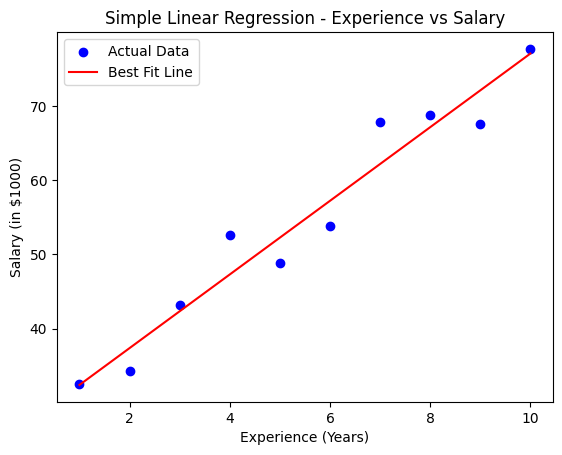

In [46]:
#step 8: plot the actual data points
plt.scatter(X,Y, color = "blue", label = "Actual Data") # scatter plot of actual values
# step:9 plot the Regression Line (Best Fit Line)
plt.plot(X,Y_pred, color = "red", label = "Best Fit Line") # Regression Line
# step 10 : Add labels and legend
plt.xlabel('Experience (Years)') # Label for X-axis
plt.ylabel('Salary (in $1000)') #Label for Y-axis
plt.title('Simple Linear Regression - Experience vs Salary') # Title for the plot
plt.legend()

#step 11: Display the graph
plt.show() # Show the final plotted graph

<h2>Prediction Features</h2>

In [34]:
while True:
    try:
        exp = float(input("\n Enter yers of experience to predict salary (or -1 to exit)"))
        if exp == -1:
            break # Exit the loop
        predicted_salary = model.predict(np.array([[exp]]))[0]
        print(f"Predicted Salary for {exp} years of experience: ${predicted_salary:.2f}K")
    except ValueError:
        print("Please Enter a valid Number!")

Predicted Salary for 4.0 years of experience: $47.29K
